# Understanding Decision Trees in Machine Learning

Decision Trees are widely used for classification and regression problems. This notebook demonstrates how to preprocess data, train a Decision Tree model, and visualize the results using the Titanic dataset.

In [19]:
# Importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing
We will handle missing values, remove unnecessary columns, and convert non-numeric data to numeric.

In [21]:
# Drop irrelevant columns
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Handle missing values without inplace modification
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Convert categorical to numeric
data['Sex'] = data['Sex'].map({"male": 0, "female": 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Check processed data
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


## Splitting Data into Training and Test Sets
We split the data into training and testing sets to evaluate the model's performance.

In [23]:
# Features and target
X = data.drop("Survived", axis=1)
y = data["Survived"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building and Visualizing the Decision Tree

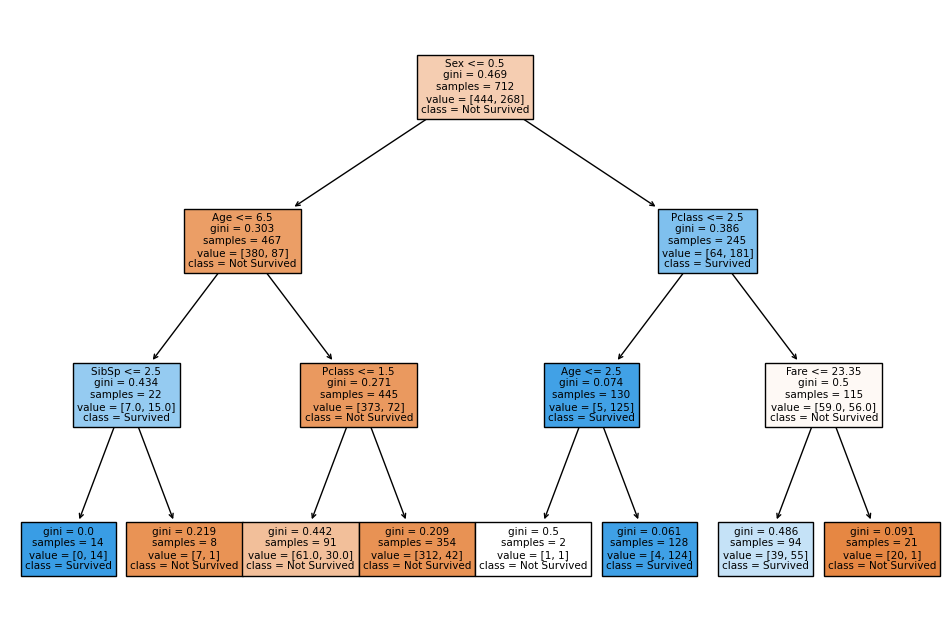

In [25]:
# Train the Decision Tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

## Evaluating the Model
Measure the model's accuracy using the test set.

In [27]:
# Predictions and accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


## Conclusion
Decision Trees are a powerful and interpretable algorithm. This notebook demonstrated preprocessing, training, and evaluating a Decision Tree model using the Titanic dataset.